# Análise de despesas da equipe de Marketing - Y.Afisha

O projeto consiste em preparar um relatório para a empresa Y.Afisha, com o objetivo de otimizar suas despesas com marketing. A pessoa responsável terá acesso aos seguintes dados:

* Logs do servidor: contendo informações sobre os acessos à plataforma Y.Afisha no período de janeiro de 2017 até dezembro de 2018.

* Arquivo de despejo: com registros de todos os pedidos realizados durante o período em questão.

* Estatísticas de despesas com marketing: fornecendo informações sobre os gastos da empresa nessa área.

O relatório será utilizado para auxiliar a empresa na tomada de decisões estratégicas relacionadas às despesas com marketing, visando otimizar os recursos e maximizar os resultados alcançados pela Y.Afisha.

# Introdução ao projeto

Neste projeto, será realizada uma análise de dados para a empresa Y.Afisha, com o objetivo de otimizar suas despesas de marketing. O responsável pelo projeto analisará as seguintes informações:

- Como os clientes utilizam o produto.
- Quando os clientes começam a fazer compras.
- Quanto dinheiro cada cliente traz para a empresa.
- Quando as despesas de marketing são cobertas.

O projeto será dividido em etapas, conforme descrito abaixo:

Passo 1: Preparação dos dados
- Os dados sobre acessos, pedidos e despesas serão carregados e armazenados em variáveis.
- Será realizada a otimização dos dados para análise, garantindo que cada coluna contenha o tipo correto de informações.

Caminhos dos arquivos:
- /datasets/visits_log_us.csv - Conjunto de dados de logs de visitas.
- /datasets/orders_log_us.csv - Conjunto de dados de logs de pedidos. 
- /datasets/costs_us.csv - Conjunto de dados de despesas.

Passo 2: Geração de relatórios e cálculo de métricas
- Serão realizadas análises específicas sobre o produto, vendas e marketing, visando responder às perguntas propostas.
- Serão calculadas métricas como o número de usuários por dia, semana e mês, duração média das sessões, taxa de retorno dos usuários, período de conversão entre registro e compra, número médio de pedidos, valor médio de compra e receita gerada pelos clientes.

Passo 3: Elaboração de conclusões e recomendações
- Com base nas análises e métricas obtidas, serão fornecidas recomendações aos especialistas de marketing sobre a alocação de recursos financeiros e as melhores estratégias de investimento.
- Será destacado o desempenho das diferentes origens de anúncios e dispositivos, bem como as mudanças ao longo do tempo.
- Uma conclusão será apresentada, embasando as recomendações feitas e as principais descobertas obtidas.

Formato:
- A tarefa deve ser concluída em um notebook Jupyter.
- O código deve ser inserido nas células de código e as explicações de texto nas células markdown, com formatação adequada e utilização de cabeçalhos.

Descrição dos dados:
A tabela "visits" contém logs do servidor com informações sobre os acessos ao site Y.Afisha, com as seguintes colunas:
- Uid: identificador único do usuário.
- Device: dispositivo utilizado pelo usuário.
- Start Ts: data e hora de início da sessão.
- End Ts: data e hora de finalização da sessão.
- Source Id: identificador da origem do anúncio pelo qual o usuário chegou ao site.

A tabela "orders" contém dados sobre os pedidos realizados pelos usuários, com as seguintes colunas:
- Uid: identificador único do usuário que fez o pedido.
- Buy Ts: data e hora do pedido.
- Revenue: receita gerada pela Y.Afisha com o pedido.

A tabela "costs" contém dados sobre as despesas com marketing, com as seguintes colunas:
- source_id: identificador da origem do anúncio.
- dt: data.
- costs: despesas relacionadas a essa origem de anúncio nesse dia.


Passo 4: Conclusões

Iremos gerar conclusões com recomendações de investimentos para os especialistas. As plataformas que iremos recomendar se basendo em métricas explicando como encontramos e o porquê seria interessante investir baseado nas nossas premissas e métricas. 

## Importação dos nossos dados e carregamento das bases

Iremos carregar as bibliotecas que iremos usar para gerar as análises e gráficos.

Iremos explicar cada um dos usos das bibliotecas:

* pandas --> análise de dados;
* numpy --> geração de gráficos e auxílio ao pandas;
* matplotlib.pyplot --> geração de gráficos 

Após isso iremos abrir nossos dados em diferentes seções e analisar a qualidade das bases e realizar as correções devidas em cada uma das seções como pré-análise de dados e processamento de base.

In [1]:
# Carregando nossas bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Base visits_log_us.csv e carregamento de dados

Como observado anteriormente iremos abrir a base de dados **visits_log_us.csv** realizando uma pré-análise de dados, processamento do dado e possível limpeza, indicando os erros e as mudanças

In [2]:
# abrindo a tabela visits_log_us

# Carregando dados no computador pessoal
try:
    df_visits = pd.read_csv(r'/datasets/visits_log_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_visits = pd.read_csv(r'/datasets/visits_log_us.csv')

In [3]:
# mostrando a df 
df_visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# informações gerais da df
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


**Conclusão Intermediária**

Nossos dados estão formatados com algumas observações, sendo:

- End Ts --> Está como object e iremos transferir como DateTime
- End Ts --> Está como object e iremos transferir como DateTime

#### Exploração de dados de df_visits

Iremos analisar cada uma das colunas com o intuito de analisar a procedência e veracidade dos dados. Além disso, vamos procurar por duplicadas implícitas, analisar o frame de datas também.

De primeiro momento, podemos ver que precisamos padronizar o nome das colunas para snake_case de início e depois iremos análisar cada coluna.

In [5]:
# Renomeando colunas para snake_case
df_visits = df_visits.rename(columns={'End Ts': 'end_ts'})
df_visits = df_visits.rename(columns={'Source Id': 'source_id'})
df_visits = df_visits.rename(columns={'Start Ts': 'start_ts'})

# Deixando as colunas em mínusculo
df_visits.columns = df_visits.columns.str.lower()

In [6]:
# mostrando a df_visits
df_visits.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


##### Dados da coluna device

Iremos analisar os dados únicos em **device** para verificar os dados e valores únicos nessa coluna.

In [7]:
# dados únicos em device
df_visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

**Conclusão Intermediária** 

Ao analisar vemos que todos os dados estão ok e parecem bons, sem duplicatas.

##### Dados da coluna end_ts

Iremos analisar os dados  em **end_ts** para verificar os dados e valores únicos nessa coluna.

Primeiramente iremos transformar os dados do tipo object para o tipo Datetime. Depois iremos analisar o range de dados (das datas).

In [8]:
# Transformando nossa coluna para datetime
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])

# Verificando o novo tipo de dado da coluna "End Ts"
print(df_visits['end_ts'].dtype)

datetime64[ns]


In [9]:
df_visits.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [10]:
# analisando as datas de end_ts

data_inicio = df_visits['end_ts'].min()
data_fim = df_visits['end_ts'].max()

print("Data de início:", data_inicio)
print("Data de fim:", data_fim)

Data de início: 2017-06-01 00:02:00
Data de fim: 2018-06-01 01:26:00


**Conclusão Intermediária** 

Alteramos os dados para o tipo datetime64 e podemos ver que o frame de data é que a base foi coletada durante 1 ano de operações inteiro.

##### Dados da coluna source_id

Iremos analisar os dados  em **source_id** para verificar os dados e valores únicos nessa coluna. Iremos utilizar essa informação posteriormente com o link a outra tabela.

In [11]:
df_visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

##### Dados da coluna start_ts

Iremos analisar os dados  em **start_ts** para verificar os dados e valores únicos nessa coluna.

Primeiramente iremos transformar os dados do tipo object para o tipo Datetime. Depois iremos analisar o range de dados (das datas).

In [12]:
# Transformando nossa coluna para datetime
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])

# Verificando o novo tipo de dado da coluna "start_ts"
print(df_visits['start_ts'].dtype)

datetime64[ns]


In [13]:
# analisando as datas de start_ts

data_inicio = df_visits['start_ts'].min()
data_fim = df_visits['start_ts'].max()

print("Data de início:", data_inicio)
print("Data de fim:", data_fim)

Data de início: 2017-06-01 00:01:00
Data de fim: 2018-05-31 23:59:00


**Conclusão Intermediária** 

Alteramos os dados para o tipo datetime64 e podemos ver que o frame de data é que a base foi coletada durante 1 ano de operações inteiro.

### Base orders_log_us e carregamento de dados

Como observado anteriormente iremos abrir a base de dados **orders_log_us** realizando uma pré-análise de dados, processamento do dado e possível limpeza, indicando os erros e as mudanças.

In [14]:
# abrindo a tabela orders_log_us

# Carregando dados no computador pessoal
try:
    df_orders = pd.read_csv(r'/datasets/orders_log_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_orders = pd.read_csv(r'/datasets/orders_log_us.csv')

In [15]:
# mostrando a df 
df_orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [16]:
# informações da df
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


#### Exploração de dados de df_orders

Iremos analisar cada uma das colunas com o intuito de analisar a procedência e veracidade dos dados. Além disso, vamos procurar por duplicadas implícitas, analisar o frame de datas também.

De primeiro momento, podemos ver que precisamos padronizar o nome das colunas para snake_case de início e depois iremos análisar cada coluna.

In [17]:
# Renomeando colunas para snake_case
df_orders = df_orders.rename(columns={'Buy Ts': 'buy_ts'})

# Deixando as colunas em mínusculo
df_orders.columns = df_orders.columns.str.lower()

In [18]:
df_orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


##### Dados da coluna buy_ts

Iremos analisar os dados  em **buy_ts** para verificar os dados e valores únicos nessa coluna.

Primeiramente iremos transformar os dados do tipo object para o tipo Datetime. Depois iremos analisar o range de dados (das datas).

In [19]:
# Transformando nossa coluna para datetime
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

# Verificando o novo tipo de dado da coluna "start_ts"
print(df_orders['buy_ts'].dtype)

datetime64[ns]


In [20]:
# analisando as datas de buy_ts

data_inicio = df_orders['buy_ts'].min()
data_fim = df_orders['buy_ts'].max()

print("Data de início:", data_inicio)
print("Data de fim:", data_fim)

Data de início: 2017-06-01 00:10:00
Data de fim: 2018-06-01 00:02:00


**Conclusão Intermediária**

Os dados estão corrigidos e parecem estar no mesmo range de data que a outra base recebida.

##### Dados da coluna revenue

Iremos analisar os dados em **revenue** para verificar os dados e valores dessa tabela e o máximo e mínimo.

In [21]:
# analisando as datas de revenue

minimo = df_orders['revenue'].min()
maximo = df_orders['revenue'].max()

print("Mínimo:", minimo)
print("Máximo:", maximo)

Mínimo: 0.0
Máximo: 2633.28


In [22]:
# valores igual a zero

df_orders[df_orders['revenue'] == 0]

,buy_ts,revenue,uid
1802,2017-06-22 18:19:00,0.0,17030528792926543083
2787,2017-07-07 15:54:00,0.0,10281425020415612933
4783,2017-08-02 14:54:00,0.0,184148767273119549
5095,2017-08-09 14:48:00,0.0,5603453646174104178
5863,2017-08-23 13:43:00,0.0,5603453646174104178
6393,2017-08-30 16:30:00,0.0,5603453646174104178
6995,2017-09-06 13:57:00,0.0,5603453646174104178
7104,2017-09-07 14:37:00,0.0,5603453646174104178
7488,2017-09-11 16:53:00,0.0,10169885790465067808
8160,2017-09-18 16:49:00,0.0,2883839899480223178


**Conclusão Intermediária**

Podemos observar que há valores que estão zerados, isso pode ser devido a diversos motivos como bugs, ações de vendas específicas ou produtos sem custo financeiro.

Iremos deixar os valores zerados, pois não sabemos o motivo. Além disso, o volume de dados com essa especificidade é muito baixa assim não irá afetar de maneira efetiva nossas análises.

### Base costs_us e carregamento de dados

Como observado anteriormente iremos abrir a base de dados **costs_us** realizando uma pré-análise de dados, processamento do dado e possível limpeza, indicando os erros e as mudanças.

In [23]:
# abrindo a tabela costs_us

# Carregando dados no computador pessoal
try:
    df_costs = pd.read_csv(r'/datasets/costs_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_costs = pd.read_csv(r'/datasets/costs_us.csv')

In [24]:
# mostrando a df 
df_costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [25]:
# informação de df
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


#### Exploração de dados de df_orders

Iremos analisar cada uma das colunas com o intuito de analisar a procedência e veracidade dos dados. Além disso, vamos procurar por duplicadas implícitas, analisar o frame de datas também.

De primeiro momento, podemos ver que precisamos padronizar a coluna dt para datetime.

##### Dados da coluna source_id

Iremos comprar os dados encontrados nas colunas source_id entre as tabelas costs_us & df_visits para entendimento do padrão e visualização.

In [26]:
# unique em source_id - tabela costs
df_costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [27]:
# unique em source_id - tabela visits
df_visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

**Conclusão Intermediária**

Podemos observar que os custos representados pelos códigos 6 e 7 não são apresentados na tabela de custos da equipe de Marketing. Iremos, assim, considerar que estes anúncios não tiveram custos efetivos para a empresa, em primeiro momento.

##### Dados da coluna dt

Iremos analisar os dados  em **dt** para verificar os dados e valores máximos e mínimos.

Primeiramente iremos transformar os dados do tipo object para o tipo Datetime. Depois iremos analisar o range de dados (das datas).

In [28]:
# Transformando nossa coluna para datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

# Verificando o novo tipo de dado da coluna "start_ts"
print(df_costs['dt'].dtype)

datetime64[ns]


In [29]:
# analisando as datas de costs

minimo = df_costs['dt'].min()
maximo = df_costs['dt'].max()

print("Mínimo:", minimo)
print("Máximo:", maximo)

Mínimo: 2017-06-01 00:00:00
Máximo: 2018-05-31 00:00:00


##### Dados da coluna costs

Iremos analisar os dados  em **costs** para verificar os dados e valores máximos e mínimos.

In [30]:
# analisando em costs a coluna costs

minimo = df_costs['costs'].min()
maximo = df_costs['costs'].max()

print("Mínimo:", minimo)
print("Máximo:", maximo)

Mínimo: 0.54
Máximo: 1788.28


### Conclusão da seção

Após a análise dos dados de todas as tabelas, pudemos observar que tivemos que corrigir alguns dados, sendo estes:

- Transformação dos dados de tempo e hora para Datetime64
- Tivemos valores de revenue igual a 0, isso pode ser devido a falta de compra de produtos, a uma ação pontual ou bugs no sistema, optamos por deixar em nossa análise devido ao seu baixo peso estatístico.
- Nossa base de dados tem um frame de datas de 1 ano entre Jun-2017 a Jun-2018.

Na próxima seção iremos trabalhar adicionando dados da data para facilitar nossas análises posteriores.

### Adicionando colunas suporte

Iremos adicionar colunas que servirão para facilitar nossas futuras análises. 

As adições serão as seguintes:

1) Para df_visits:

* adicionar coluna end_ts_day / start_ts_day / week / month / session_lenght


2) Para df_orders:

* adicionar a coluna buy_ts_day / week / month


3) Para df_orders

* não adicionar nada.

In [31]:
# Adições na coluna df_visits
df_visits['end_ts_day'] = df_visits['end_ts'].dt.day
df_visits['start_ts_day'] = df_visits['start_ts'].dt.day
df_visits['week'] = df_visits['start_ts'].dt.week
df_visits['month'] = df_visits['start_ts'].dt.month
df_visits['year'] = df_visits['start_ts'].dt.year
df_visits['session_length'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

# mostrando df
df_visits

/tmp/ipykernel_59/137765097.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_visits['week'] = df_visits['start_ts'].dt.week


,device,end_ts,source_id,start_ts,uid,end_ts_day,start_ts_day,week,month,year,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,20,51,12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,19,8,2,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,1,26,7,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,20,5,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,27,52,12,2017,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,29,30,7,2017,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,25,4,1,2018,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,3,9,3,2018,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,2,44,11,2017,19


In [32]:
# Adicionando colunas em df_orders
df_orders['buy_ts_day'] = df_orders['buy_ts'].dt.day
df_orders['week'] = df_orders['buy_ts'].dt.week
df_orders['month'] = df_orders['buy_ts'].dt.month

# mostrando df
df_orders

/tmp/ipykernel_59/2203211842.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_orders['week'] = df_orders['buy_ts'].dt.week


,buy_ts,revenue,uid,buy_ts_day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,22,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,22,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,22,6
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,31,22,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,31,22,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,31,22,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,31,22,5


## Análise de dados e criação de report

Nesta seção de análise de dados, iremos explorar métricas relacionadas ao produto, vendas e marketing. Será analisado o uso do produto, com informações sobre o número de usuários diários, semanais e mensais, bem como a frequência e duração das sessões. Em seguida, serão investigadas as métricas de vendas, incluindo o momento em que os clientes começam a comprar, a quantidade de pedidos e o valor médio das compras. Por fim, será avaliado o desempenho do marketing, analisando os investimentos, o custo de aquisição de clientes e a rentabilidade dos esforços.

Serão utilizados gráficos para visualizar as métricas em relação a diferentes dispositivos e origens de anúncios, bem como seu comportamento ao longo do tempo. Essas visualizações fornecerão uma compreensão clara das tendências e padrões existentes, permitindo identificar insights estratégicos importantes. Com base nesses gráficos, poderão ser feitas recomendações para otimizar as estratégias de marketing e maximizar o retorno sobre o investimento.

A análise de dados abordará aspectos fundamentais do negócio, desde o uso do produto até as estratégias de vendas e marketing. Por meio das métricas exploradas, será possível identificar oportunidades de melhorias, direcionar os esforços de marketing de forma mais eficiente e tomar decisões embasadas nos resultados obtidos. Com uma visão abrangente desses dados, será possível tomar medidas estratégicas para impulsionar o desempenho da empresa e alcançar melhores resultados financeiros.

### Análise de produto

Iremos análisar as condições de uso e sessões do produto, com a geração de reports acerca de:

- Quantas pessoas usam-no cada dia, semana e mês?
- Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
- Que comprimento tem cada sessão?
- Com que frequência os usuários voltam?	

#### Quantas pessoas usam-no cada dia, semana e mês?

Iremos utilizar a nossa base de dados df_visits para geração dos insights necessários.

In [33]:
# gerando as informações de dataframe
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   device          359400 non-null  object        
 1   end_ts          359400 non-null  datetime64[ns]
 2   source_id       359400 non-null  int64         
 3   start_ts        359400 non-null  datetime64[ns]
 4   uid             359400 non-null  uint64        
 5   end_ts_day      359400 non-null  int64         
 6   start_ts_day    359400 non-null  int64         
 7   week            359400 non-null  int64         
 8   month           359400 non-null  int64         
 9   year            359400 non-null  int64         
 10  session_length  359400 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(1), uint64(1)
memory usage: 30.2+ MB


In [34]:
# Quantidade de pessoas que usam o produto por dia
df_visits_day = df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].nunique().reset_index()

# Quantidade de pessoas que usam o produto por semana
df_visits_week = df_visits.groupby(['week', 'year'])['uid'].nunique().reset_index()

# Quantidade de pessoas que usam o produto por mês
df_visits_month = df_visits.groupby(df_visits['start_ts'].dt.to_period('M'))['uid'].nunique().reset_index()

In [35]:
# Ordenar a DataFrame pelo ano e pelo mês
df_visits_week = df_visits_week.sort_values(by=['year', 'week'])

In [36]:
df_visits_day

,start_ts,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


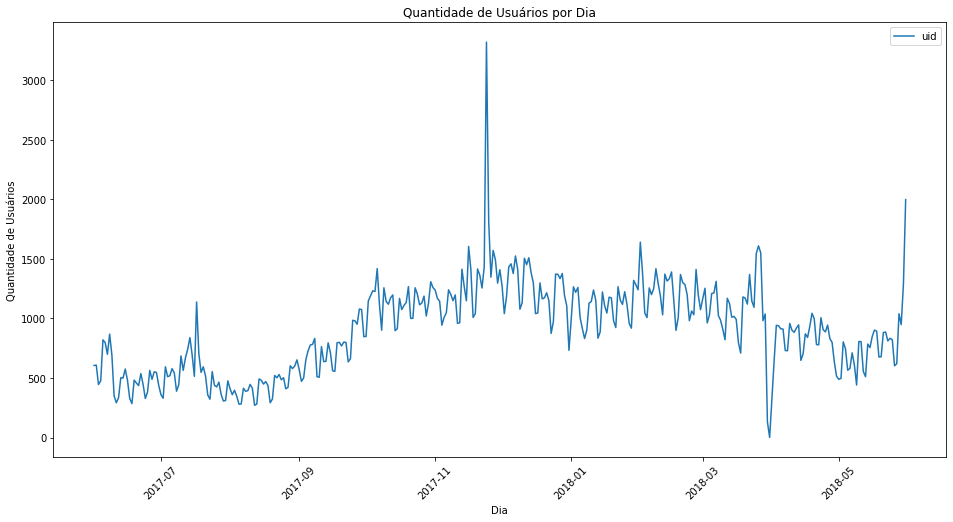

In [37]:
# Gráfico de linhas diário
df_visits_day.plot(x='start_ts', y='uid', figsize=(16, 8))
plt.xlabel('Dia')
plt.ylabel('Quantidade de Usuários')
plt.title('Quantidade de Usuários por Dia')
plt.xticks(rotation=45)
plt.show()

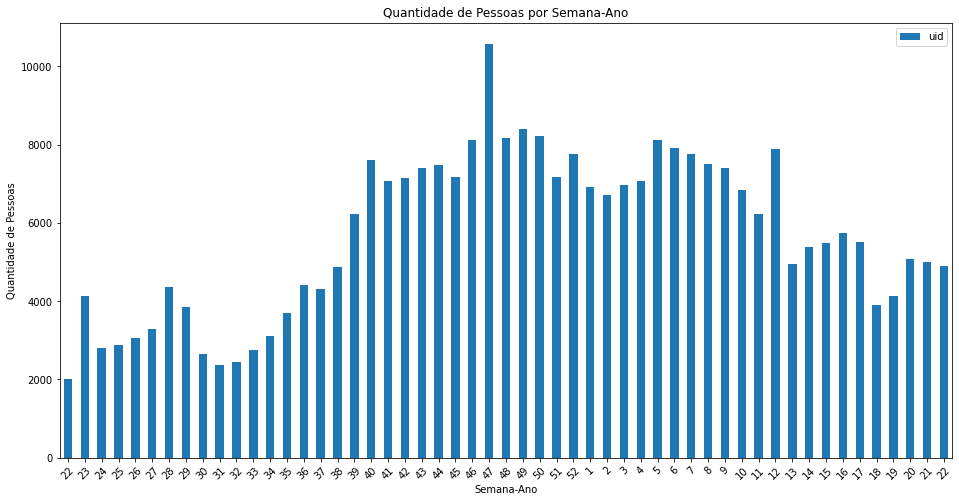

In [38]:
# Plotar gráfico de barras
df_visits_week.plot(kind='bar', x='week', y='uid', figsize=(16, 8))
plt.xlabel('Semana-Ano')
plt.ylabel('Quantidade de Pessoas')
plt.title('Quantidade de Pessoas por Semana-Ano')
plt.xticks(rotation=45)
plt.show()

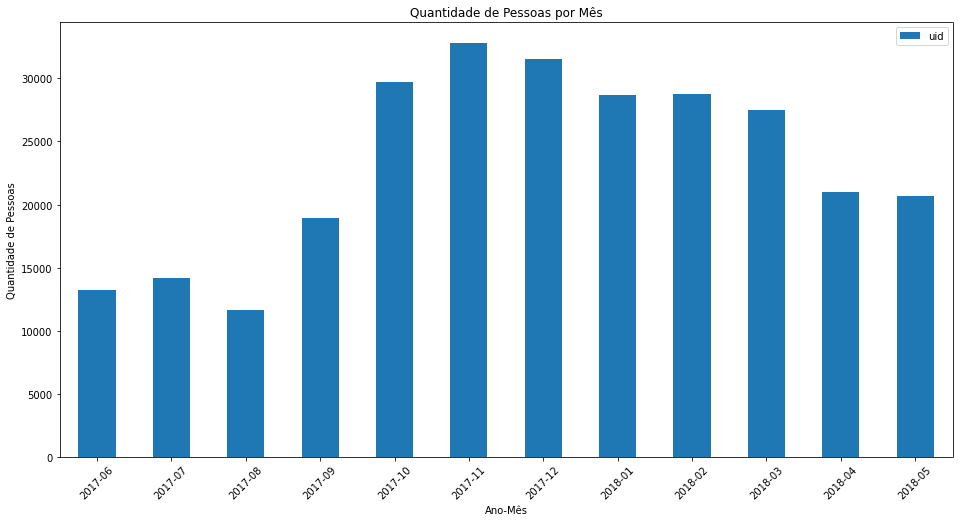

In [39]:
# Plotar gráfico de barras
df_visits_month.plot(kind='bar', x='start_ts', y='uid', figsize=(16, 8))
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade de Pessoas')
plt.title('Quantidade de Pessoas por Mês')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Quantidades médias diárias, semanais, mensais

# Média de UID únicos por dia
media_uid_dia = df_visits_day['uid'].mean()
print("Média de UID únicos por dia:", media_uid_dia)

# Média de UID únicos por semana
media_uid_semana = df_visits_week['uid'].mean()
print("Média de UID únicos por semana:", media_uid_semana)

# Média de UID únicos por mês
media_uid_mes = df_visits_month['uid'].mean()
print("Média de UID únicos por mês:", media_uid_mes)


Média de UID únicos por dia: 907.9917582417582
Média de UID únicos por semana: 5716.245283018868
Média de UID únicos por mês: 23228.416666666668


##### Conclusão

Por meio dos gráficos e dados gerados podemos tirar algumas conclusões iniciais:

* A quantidade de pessoas que usam aumenta do meio do ano para o final do ano, ou seja há uma evidência nesse frame de dados da sazonalidade de uso.

* O período com maior uso é entre Outubro a Março.

* O período com menor uso é entre Junho e Agosto.

* Não podemos afirmar com certeza se é sazonalidade ou foram as campanhas de marketing que impulsionaram o crescimento no período específico.

* A média de usuários únicos por dia é de, aproximadamente, 908 usuários

* A média semanal de usuários é de 5716.

* A média mensal de usuário é de 23228 usuários.

* No gráfico diário podemos observar duas anomalias, uma de alta em dezembro e outra de baixa em Abril.

Por via de análise iremos calcular a retenção mensal, visto que, nosso frame de dados é de 1 ano. Assim poderemos entender como os clientes estão se comportando ao longo do tempo e qual a retenção ao longo do tempo.

In [41]:
# A primeira atividade de cada usuário
first_activity_date = df_visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
df_visits = df_visits.join(first_activity_date, on='uid')

# Mensal
df_visits['activity_month'] = df_visits['start_ts'].dt.to_period('M')
df_visits['first_activity_month'] = df_visits['first_activity_date'].dt.to_period('M')
df_visits['cohort_lifetime_month'] = (df_visits['activity_month'] - df_visits['first_activity_month']).apply(lambda x: x.n)

# Calcular cohorts mensais
cohorts_month = df_visits.groupby(['first_activity_month', 'cohort_lifetime_month']).agg({'uid': 'nunique'}).reset_index()
initial_users_count_month = cohorts_month[cohorts_month['cohort_lifetime_month'] == 0][['first_activity_month', 'uid']]
initial_users_count_month = initial_users_count_month.rename(columns={'uid': 'cohort_users_month'})
cohorts_month = cohorts_month.merge(initial_users_count_month, on='first_activity_month')
cohorts_month['retention_month'] = cohorts_month['uid'] / cohorts_month['cohort_users_month']

# Criar tabela de retenção
retention_pivot_month = cohorts_month.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime_month',
    values='retention_month',
    aggfunc='sum',
)

retention_pivot_month

cohort_lifetime_month,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conclusão**

* Retenção geralmente diminui ao longo do tempo: Como é típico em muitas análises de retenção, a porcentagem de usuários que permanece ativa diminui à medida que o tempo passa. Isso é esperado, pois alguns usuários param de usar o serviço ou produto por vários motivos.


* Cohorts mais antigos têm maior retenção: Em geral, os cohorts de 2017 parecem ter maior retenção que os cohorts de 2018. Isso pode ser devido a uma variedade de fatores, como mudanças no produto, no mercado, na concorrência ou na base de usuários.


* O primeiro mês é crítico para a retenção: A maior queda na retenção ocorre entre o primeiro mês (onde a retenção é, por definição, 100%) e o segundo mês. Isso sugere que o primeiro mês de uso é um período crítico para envolver os usuários e incentivá-los a continuar usando o serviço.


* Retenção é inconsistente entre cohorts: A retenção varia significativamente entre diferentes cohorts. Por exemplo, a retenção no segundo mês varia de cerca de 4% (para o cohort de março de 2018) a cerca de 8% (para o cohort de setembro de 2017). Isso sugere que fatores externos, possivelmente específicos para cada mês, estão afetando a retenção.

#### Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).

Iremos agora analisar as sessões diárias, sem contar usuários únicos.

In [42]:
# mostrando nossa df para relembrar
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   device                 359400 non-null  object        
 1   end_ts                 359400 non-null  datetime64[ns]
 2   source_id              359400 non-null  int64         
 3   start_ts               359400 non-null  datetime64[ns]
 4   uid                    359400 non-null  uint64        
 5   end_ts_day             359400 non-null  int64         
 6   start_ts_day           359400 non-null  int64         
 7   week                   359400 non-null  int64         
 8   month                  359400 non-null  int64         
 9   year                   359400 non-null  int64         
 10  session_length         359400 non-null  int64         
 11  first_activity_date    359400 non-null  datetime64[ns]
 12  activity_month         359400 non-null  peri

In [43]:
# calculando o número de usuários para cada dia
df_sessions = df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].count().reset_index()

# mostrando df
df_sessions

,start_ts,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


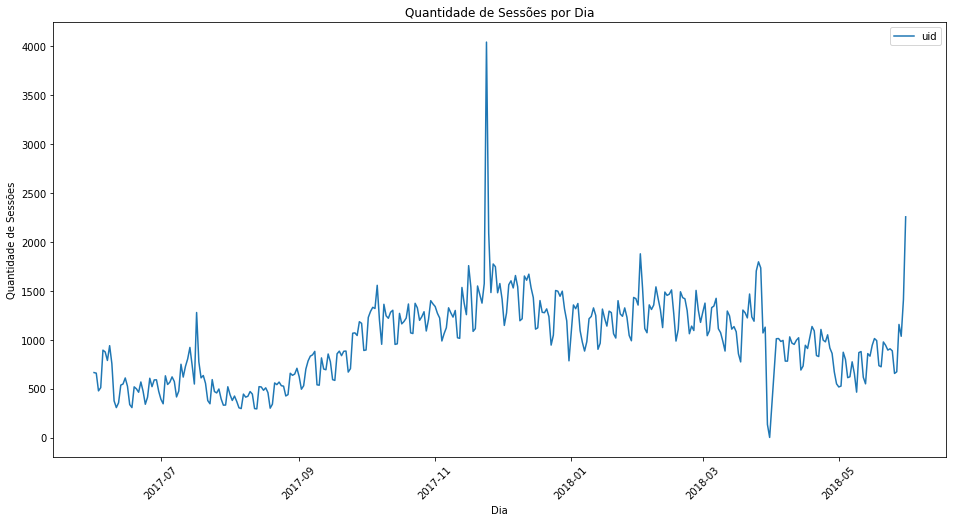

In [44]:
# Gráfico de linhas diário
df_sessions.plot(x='start_ts', y='uid', figsize=(16, 8))
plt.xlabel('Dia')
plt.ylabel('Quantidade de Sessões')
plt.title('Quantidade de Sessões por Dia')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Média de Sessões diárias
media_sessions = df_sessions['uid'].mean()
print("Média de Sessions diárias:", media_sessions)

Média de Sessions diárias: 987.3626373626373


#### Conclusão

Por meio do gráfico e dado gerados podemos tirar algumas conclusões iniciais:

* O comportamento entre os gráficos de usuários únicos e sessões são parecidas.

* O valor médio de sessões e usuários únicos não tem grande alteração.

* O conjunto das últimas conclusões e dos gráficos analisados demonstram que os usuários tem a tendência de acessar 1 vez ao dia para utilizar o serviço, pois os valores da média são perto e os gráficos tem comportamento muito similar.

#### Que comprimento tem cada sessão?

In [46]:
# mostrando as informações da df
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   device                 359400 non-null  object        
 1   end_ts                 359400 non-null  datetime64[ns]
 2   source_id              359400 non-null  int64         
 3   start_ts               359400 non-null  datetime64[ns]
 4   uid                    359400 non-null  uint64        
 5   end_ts_day             359400 non-null  int64         
 6   start_ts_day           359400 non-null  int64         
 7   week                   359400 non-null  int64         
 8   month                  359400 non-null  int64         
 9   year                   359400 non-null  int64         
 10  session_length         359400 non-null  int64         
 11  first_activity_date    359400 non-null  datetime64[ns]
 12  activity_month         359400 non-null  peri

Para este caso iremos analisar a distribuição dos dados na coluna 'session_lenght', pois iremos análisar qual medida estatística iremos utilizar para representar os dados centrais.

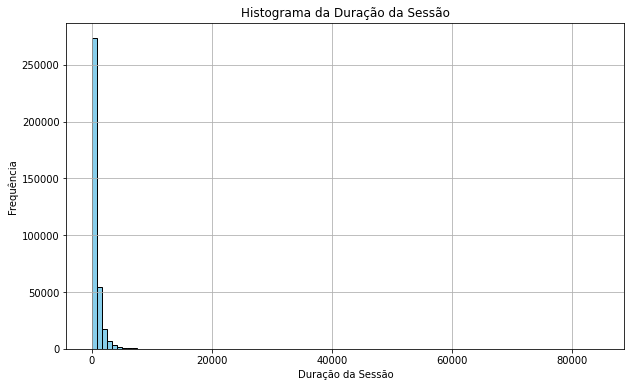

In [47]:
# Gerando histograma

plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df_visits['session_length'], bins=100, color='skyblue', edgecolor='black')  # Gera o histograma
plt.xlabel('Duração da Sessão')  # Define o rótulo do eixo x
plt.ylabel('Frequência')  # Define o rótulo do eixo y
plt.title('Histograma da Duração da Sessão')  # Define o título do gráfico
plt.grid(True)  # Adiciona linhas de grade
plt.show()  # Exibe o gráfico


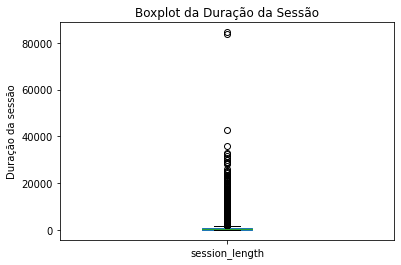

In [48]:
df_visits['session_length'].plot.box()
plt.ylabel('Duração da sessão')
plt.title('Boxplot da Duração da Sessão')
plt.show()

Iremos para melhor credibilidade dos dados retirar os outliers de nossa análise e reavaliar a distribuição. Faremos isso, pois esses dados podem afetar e 'sujar' nossa amostra, tiramos isso embasado no histograma gerado onde os valores que mais ocorrem estão a esquerda do gráfico com grande presença.

No Boxplot gerado podemos observar o mesmo efeito, visto que existem durações de sessões muito grandes, por exemplo 20.000 segundos é que valem a 5 horas de sessão.

Valores do boxplot:
Mínimo: 0.0
Primeiro quartil (Q1): 120.0
Mediana: 300.0
Terceiro quartil (Q3): 840.0
Máximo: 1920.0


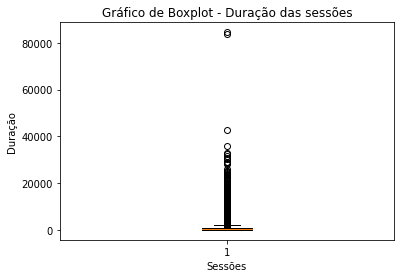

In [49]:
# Gerando gráfico e coletando os valores de box
boxplot_dict = plt.boxplot(df_visits['session_length'])
boxplot_values = [item.get_ydata() for item in boxplot_dict['medians']]
min_value = boxplot_dict['whiskers'][0].get_ydata()[1]
q1_value = boxplot_dict['boxes'][0].get_ydata()[0]
median_value = boxplot_values[0][0]
q3_value = boxplot_dict['boxes'][0].get_ydata()[2]
max_value = boxplot_dict['whiskers'][1].get_ydata()[1]

# Adicionando título e rótulos aos eixos x e y
plt.title('Gráfico de Boxplot - Duração das sessões')
plt.xlabel('Sessões')
plt.ylabel('Duração')

# Imprimindo valores
print('Valores do boxplot:')
print('Mínimo:', min_value)
print('Primeiro quartil (Q1):', q1_value)
print('Mediana:', median_value)
print('Terceiro quartil (Q3):', q3_value)
print('Máximo:', max_value)

plt.show()

Para este fim e de melhor representação iremos considerar tudo que está acima do valor máximo obtido como anomalia e retirar de nossa análise.

In [50]:
# filtrando nova df para valores até o máximo
df_visits_filter = df_visits[df_visits['session_length'] < 1920]
df_visits_filter

,device,end_ts,source_id,start_ts,uid,end_ts_day,start_ts_day,week,month,year,session_length,first_activity_date,activity_month,first_activity_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,20,51,12,2017,1080,2017-12-20 17:20:00,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,19,8,2,2018,1680,2018-02-19 16:53:00,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,1,26,7,2017,0,2017-07-01 01:54:00,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,20,5,2018,1440,2018-03-09 20:05:00,2018-05,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,27,52,12,2017,0,2017-12-27 14:06:00,2017-12,2017-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,29,30,7,2017,19,2017-07-29 19:07:00,2017-07,2017-07,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,25,4,1,2018,19,2018-01-25 17:38:00,2018-01,2018-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,3,9,3,2018,19,2018-03-03 10:12:00,2018-03,2018-03,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,2,44,11,2017,19,2017-11-02 10:12:00,2017-11,2017-11,0


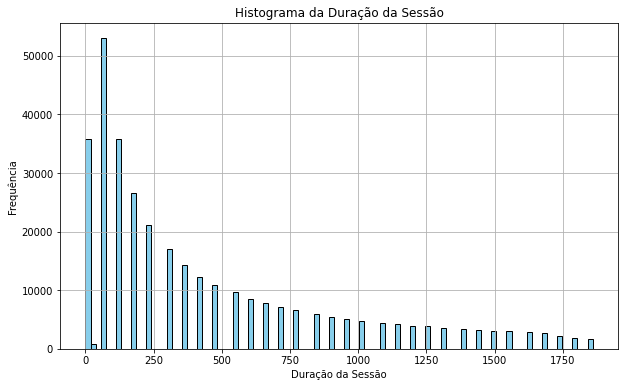

In [51]:
# Gerando novo histograma

plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df_visits_filter['session_length'], bins=100, color='skyblue', edgecolor='black')  # Gera o histograma
plt.xlabel('Duração da Sessão')  # Define o rótulo do eixo x
plt.ylabel('Frequência')  # Define o rótulo do eixo y
plt.title('Histograma da Duração da Sessão')  # Define o título do gráfico
plt.grid(True)  # Adiciona linhas de grade
plt.show()  # Exibe o gráfico

**Conclusão Intermediária**

Temos uma distribuição assimétrica em que os dados estão concentrados na parte esquerda e diminuem gradualmente em direção à direita. Assim para representar o valor central, iremos utilizar a mediana, pois é o valor que divide o conjunto de dados em duas partes iguais, com 50% dos valores abaixo dela e 50% acima. A mediana é uma medida robusta que não é afetada por valores extremos.

In [52]:
# gerando a mediana dos dados

lenght_median = df_visits_filter['session_length'].median()

# mostrando os valores
print(f'A tendência é que as pessoas passem, aproximadamente, {lenght_median/60} minutos no site.')

A tendência é que as pessoas passem, aproximadamente, 4.0 minutos no site.


##### Conclusão

Como conclusão podemos tirar que:

* Existem dados com anomalias, estes tem uma duração muito alta, isso pode ser devido a deixar a página aberta no navegador, ou bugs.

* Existem valores zerados, ou seja, podem ser pessoas que abrem e fecham o site por erros de digitação, etc.

* A tendência é de que as pessoas passem 4 minutos no site.

#### Com que frequência os usuários voltam?	

In [53]:
# mostrando a df
df_visits

,device,end_ts,source_id,start_ts,uid,end_ts_day,start_ts_day,week,month,year,session_length,first_activity_date,activity_month,first_activity_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,20,51,12,2017,1080,2017-12-20 17:20:00,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,19,8,2,2018,1680,2018-02-19 16:53:00,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,1,26,7,2017,0,2017-07-01 01:54:00,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,20,5,2018,1440,2018-03-09 20:05:00,2018-05,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,27,52,12,2017,0,2017-12-27 14:06:00,2017-12,2017-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,29,30,7,2017,19,2017-07-29 19:07:00,2017-07,2017-07,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,25,4,1,2018,19,2018-01-25 17:38:00,2018-01,2018-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,3,9,3,2018,19,2018-03-03 10:12:00,2018-03,2018-03,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,2,44,11,2017,19,2017-11-02 10:12:00,2017-11,2017-11,0


In [54]:
# Contando a frequência de retorno dos usuários
frequencia = df_visits['uid'].value_counts().value_counts().sort_index().reset_index()

# Exibindo os resultados
frequencia

,index,uid
0,1,176041
1,2,30926
2,3,10184
3,4,4357
4,5,2283
...,...,...
140,343,1
141,357,1
142,551,1
143,615,1


**Explicando o código**

Usamos o método value_counts() para contar o número de ocorrências de cada valor único na coluna 'uid'. Em seguida, usamos novamente o método value_counts() para contar a frequência dos diferentes valores obtidos no passo anterior. Isso nos dará a contagem da frequência de retorno dos usuários.

Por fim, classificamos os resultados em ordem crescente usando o método sort_index() e os exibimos na saída padrão e utilizamos o reset_index() para transformar novamente em um dataframe.

**Passos**

Já podemos ver que a maior parte dos usuários utiliza somente 1 vez o serviço. Neste caso, podemos ver que temos o peso para cada uma das medidas e o que podemos fazer é realizar um cálculo de média ponderada.

In [55]:
# Calcular a média ponderada
weighted_sum = (frequencia['index'] * frequencia['uid']).sum()
total_uid = frequencia['uid'].sum()
weighted_average = weighted_sum / total_uid

# Exibir o resultado
print("Média ponderada:", weighted_average)

Média ponderada: 1.5751482453795214


##### Conclusão

Com base nos dados fornecidos e na média ponderada de 1.57, podemos concluir que a maioria das ocorrências tem um único usuário. Existem usuários que abrem frequentemente o serviço, aproximadamente 893 vezes, mas não sabemos se podemos levar em consideração, pois podem ser até trabalhadores/desenvolvedores que olha o site afim da melhoria contínua entre outros motivos.

### Análise de vendas

Iremos análisar as condições de uso e sessões do produto, com a geração de reports acerca de:

* Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)
* Quantos pedidos os clientes fazem durante um determinado período de tempo?
* Qual é o volume médio de uma compra?
* Quanto dinheiro eles trazem para a empresa (LTV)?

Iremos analisar a DataFrame de pedidos orders_log_us para entender como poderemos captar os valores e após isso iniciar nossas análises.

In [56]:
# Chamando a df_orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   buy_ts      50415 non-null  datetime64[ns]
 1   revenue     50415 non-null  float64       
 2   uid         50415 non-null  uint64        
 3   buy_ts_day  50415 non-null  int64         
 4   week        50415 non-null  int64         
 5   month       50415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), uint64(1)
memory usage: 2.3 MB


In [57]:
# mostrando a df
df_orders

,buy_ts,revenue,uid,buy_ts_day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,22,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,22,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,22,6
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,31,22,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,31,22,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,31,22,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,31,22,5


In [58]:
# df_visits
df_visits

,device,end_ts,source_id,start_ts,uid,end_ts_day,start_ts_day,week,month,year,session_length,first_activity_date,activity_month,first_activity_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,20,51,12,2017,1080,2017-12-20 17:20:00,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,19,8,2,2018,1680,2018-02-19 16:53:00,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,1,26,7,2017,0,2017-07-01 01:54:00,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,20,5,2018,1440,2018-03-09 20:05:00,2018-05,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,27,52,12,2017,0,2017-12-27 14:06:00,2017-12,2017-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,29,30,7,2017,19,2017-07-29 19:07:00,2017-07,2017-07,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,25,4,1,2018,19,2018-01-25 17:38:00,2018-01,2018-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,3,9,3,2018,19,2018-03-03 10:12:00,2018-03,2018-03,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,2,44,11,2017,19,2017-11-02 10:12:00,2017-11,2017-11,0


#### Quando as pessoas começam a comprar? 

Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência.

Assim, para tal, iremos com nossa df_visits separar os ids dos usuários e separar pelos valores mínimos destes criando uma nova df e depois iremos juntar com o mesmo procedimento em df_orders. Assim iremos ter uma df com a primeira data que o uid entrou no site e a data da primeira compra e também o source_id de cada um delas.

In [59]:
# criando uma nova df para data mínima em df_visits
df_visits_first = df_visits.groupby(['uid', 'source_id'])['start_ts'].min().reset_index()

# mostrando
df_visits_first

,uid,source_id,start_ts
0,11863502262781,3,2018-03-01 17:27:00
1,49537067089222,2,2018-02-06 15:55:00
2,297729379853735,3,2017-06-07 18:47:00
3,313578113262317,2,2017-09-18 22:49:00
4,325320750514679,5,2017-09-30 14:29:00
...,...,...,...
277865,18446403737806311543,5,2017-11-30 03:36:00
277866,18446424184725333426,4,2017-12-06 20:32:00
277867,18446556406699109058,3,2018-01-01 16:29:00
277868,18446621818809592527,4,2017-12-27 13:27:00


In [60]:
# criando uma nova df para data mínima em df_visits
df_orders_first = df_orders.groupby(['uid'])['buy_ts'].min().reset_index()

# mostrando
df_orders_first

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [61]:
# juntando as duas df gerada

merged_df = df_visits_first.merge(df_orders_first, on='uid')

# mostrando a df final

merged_df

,uid,source_id,start_ts,buy_ts
0,313578113262317,2,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,10,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,3,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,5,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,5,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...,...
57260,18446156210226471712,1,2018-02-08 15:48:00,2018-02-18 19:34:00
57261,18446156210226471712,3,2017-11-07 10:01:00,2018-02-18 19:34:00
57262,18446156210226471712,4,2017-11-07 12:52:00,2018-02-18 19:34:00
57263,18446156210226471712,5,2018-02-14 21:05:00,2018-02-18 19:34:00


In [62]:
# criando nova coluna de da diferença entre start_ts e buy_ts
merged_df['dif_date'] = merged_df['buy_ts'] - merged_df['start_ts']

# mostrando df
merged_df

,uid,source_id,start_ts,buy_ts,dif_date
0,313578113262317,2,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,10,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,3,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,5,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,5,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00
...,...,...,...,...,...
57260,18446156210226471712,1,2018-02-08 15:48:00,2018-02-18 19:34:00,10 days 03:46:00
57261,18446156210226471712,3,2017-11-07 10:01:00,2018-02-18 19:34:00,103 days 09:33:00
57262,18446156210226471712,4,2017-11-07 12:52:00,2018-02-18 19:34:00,103 days 06:42:00
57263,18446156210226471712,5,2018-02-14 21:05:00,2018-02-18 19:34:00,3 days 22:29:00


In [63]:
# assumindo que 'df' é o seu DataFrame
merged_df['dif_date'] = pd.to_timedelta(merged_df['dif_date'])

# definindo os limites para segmentação (em dias)
bins = pd.TimedeltaIndex([pd.Timedelta(days=i) for i in range(0, max(merged_df['dif_date'].dt.days) + 2)])

# criando categorias de conversão
merged_df['conversion_category'] = pd.cut(merged_df['dif_date'], bins, labels=[f'Conversão {i}d' for i in range(len(bins) - 1)])

In [64]:
# criando coorte source_id por tempo

conversion_counts = merged_df.groupby(['source_id', 'conversion_category']).size().unstack(fill_value=0)
conversion_counts

conversion_category,Conversão 0d,Conversão 1d,Conversão 2d,Conversão 3d,Conversão 4d,Conversão 5d,Conversão 6d,Conversão 7d,Conversão 8d,Conversão 9d,...,Conversão 354d,Conversão 355d,Conversão 356d,Conversão 357d,Conversão 358d,Conversão 359d,Conversão 360d,Conversão 361d,Conversão 362d,Conversão 363d
source_id,,,,,,,,,,,,,,,,,,,,,
1,3544,143,114,78,58,39,38,34,28,32,...,1,0,0,0,0,0,0,0,1,1
2,2952,175,87,81,55,45,40,40,36,27,...,0,1,0,0,0,0,0,0,0,0
3,7629,347,211,154,119,92,99,66,54,47,...,0,0,0,1,0,0,0,0,0,0
4,7836,353,209,160,105,118,78,75,60,53,...,0,0,0,1,0,0,0,0,1,0
5,5840,207,105,91,78,49,56,53,38,25,...,0,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,557,39,20,20,20,8,18,14,10,7,...,0,1,0,0,0,0,0,0,0,0
10,1057,52,26,17,12,13,9,11,13,8,...,0,0,0,2,0,0,0,0,0,0


##### Conclusão

Podemos tirar as seguintes conclusões:

* Conversão no mesmo dia (0d): A maioria dos usuários de todas as fontes faz a compra no mesmo dia em que se registram. O canal de marketing 4 tem a maior conversão no mesmo dia, seguido pelos canais 3, 1, 2 e 5. Canais 7, 9 e 10 têm números significativamente menores de conversões no mesmo dia.

* Conversões após o primeiro dia: Após o primeiro dia, o número de conversões cai drasticamente para todos os canais, mas continua a ser um número relevante. O canal 4 ainda está na liderança, seguido pelo canal 3, mas os canais 1 e 2 caem atrás do canal 5 em termos de conversões no dia seguinte.

* Conversões tardias: A grande maioria dos usuários faz uma compra dentro da primeira semana após o registro. Após uma semana, as conversões se tornam muito mais raras. No entanto, alguns usuários ainda fazem a primeira compra muitos dias após o registro - em alguns casos, quase um ano depois.

* Eficiência do canal: De acordo com esses dados, parece que os canais 3 e 4 são os mais eficientes em termos de conversões rápidas (isto é, os usuários fazem sua primeira compra logo após o registro). O canal 5 também parece ser bastante eficaz.

* Canais com baixa performance: Os canais 7, 9 e 10 parecem ter desempenho significativamente pior que os outros, com muito menos conversões totais e conversões no mesmo dia.


Entre os canais com maiores conversões iniciais o canal 4 parece ser com maior eficiência com o passar do tempo.

#### Quantos pedidos os clientes fazem durante um determinado período de tempo?

Iremos agora calcular a média do número de pedidos diariamente, semanalmente e mensalmente.

In [65]:
# mostrando a df

df_orders

,buy_ts,revenue,uid,buy_ts_day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,22,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,22,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,22,6
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,31,22,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,31,22,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,31,22,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,31,22,5


In [66]:
# calculando a média de pedidos diarimente

pedidos_diario = df_orders.groupby(df_orders['buy_ts'].dt.date)['uid'].count().mean()

print(f"A média de pedidos diária é de {pedidos_diario:.0f} pedidos")

A média de pedidos diária é de 139 pedidos


In [67]:
# calculando a média de pedidos semanalmente

pedidos_semanal = df_orders.groupby('week')['uid'].count().mean()

print(f"A média de pedidos semanal é de {pedidos_semanal:.0f} pedidos")

A média de pedidos semanal é de 970 pedidos


In [68]:
# calculando a média de pedidos mensal

pedidos_mensal = df_orders.groupby('month')['uid'].count().mean()

print(f"A média de pedidos mensal é de {pedidos_mensal:.0f} pedidos")

A média de pedidos mensal é de 4201 pedidos


##### Conclusão

Podemos observar que temos uma média de pedido diária de 139 pedidos, mensal de 970 pedidos e mensal de 4201 pedidos.

#### Qual é o volume médio de uma compra? & Quanto dinheiro eles trazem para a empresa (LTV)?

A pergunta feita pelo Stakeholder foi mal enviada, iremos considerar que o volume médio é o ticket médio de cada compra.

Para o LTV, média geral também por cliente.

In [69]:
# Cálculo do ticket médio
ticket_medio = df_orders['revenue'].mean()

print(f'O ticket médio é de {ticket_medio:.0f} dólares')

O ticket médio é de 5 dólares


In [70]:
# Ticket médio por uid
ticket_medio_group = df_orders.groupby('uid')['revenue'].mean().reset_index()

ticket_medio_group

# Cálculo a média de número de pedidos
count_group = df_orders.groupby('uid')['buy_ts'].count().reset_index()

# merged
group_filter = ticket_medio_group.merge(count_group, on = 'uid')

# LTV
group_filter['ltv_anual'] = group_filter['revenue'] * group_filter['buy_ts']

group_filter

,uid,revenue,buy_ts,ltv_anual
0,313578113262317,0.550000,1,0.55
1,1575281904278712,1.525000,2,3.05
2,2429014661409475,73.330000,1,73.33
3,2464366381792757,2.440000,1,2.44
4,2551852515556206,5.495000,2,10.99
...,...,...,...,...
36518,18445147675727495770,3.050000,1,3.05
36519,18445407535914413204,0.293333,3,0.88
36520,18445601152732270159,4.220000,1,4.22
36521,18446156210226471712,9.780000,1,9.78


In [71]:
# LTV ANUAL MÉDIO
ltv_medio_anual = group_filter['ltv_anual'].mean()

print(f'O LTV Anual Médio por cliente é de {ltv_medio_anual:.0f} dólares')

O LTV Anual Médio por cliente é de 7 dólares


In [72]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   buy_ts      50415 non-null  datetime64[ns]
 1   revenue     50415 non-null  float64       
 2   uid         50415 non-null  uint64        
 3   buy_ts_day  50415 non-null  int64         
 4   week        50415 non-null  int64         
 5   month       50415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), uint64(1)
memory usage: 2.3 MB


Iremos realizar o calculo de LTV para os Cohorts mensais de clientes para entender como se comporta.

In [73]:
# Calculando o Cohort mensal
df_orders['cohort_month'] = df_orders.groupby('uid')['buy_ts'].transform('min').dt.to_period('M')

# Ordenando mensalmente
df_orders['order_month'] = df_orders['buy_ts'].dt.to_period('M')

# Calculando a idade do cohort
df_orders['cohort_age'] = (df_orders['order_month'] - df_orders['cohort_month']).apply(lambda x: x.n)

# Calculando o faturamento mensal no cohort
cohort_data = df_orders.groupby(['cohort_month', 'cohort_age']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()

# Cálculo LTV
cohort_data['ltv'] = cohort_data['revenue'] / cohort_data['uid']

# Pivot na data
ltv_cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_age', values='ltv')

ltv_cohort_pivot

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conclusão**

* LTV varia entre cohorts: Os LTVs variam consideravelmente entre os diferentes cohorts, indicando que a quantidade de valor que um usuário médio traz para a empresa pode mudar dependendo de quando eles começaram a fazer compras.


* Aumento do LTV ao longo do tempo: Para muitos cohorts, o LTV aumenta à medida que o tempo passa, o que é esperado, pois os usuários têm mais tempo para fazer compras e, portanto, contribuir para o aumento do LTV.


* Os LTVs dos cohorts mais antigos são maiores: Em geral, os cohorts mais antigos têm LTVs maiores. Isso pode ser devido a esses usuários serem mais leais ou a empresa ter tido mais tempo para monetizar esses usuários.


* O LTV pode ser irregular ao longo do tempo: Para alguns cohorts (por exemplo, setembro de 2017), o LTV oscila, aumentando em alguns meses e diminuindo em outros. Isso pode ser devido a várias razões, como sazonalidade, mudanças na base de usuários ou no comportamento de compra, ou promoções e descontos.

### Análise de Marketing

Iremos análisar:

* Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
* Quanto custou a aquisição de clientes para cada origem?
* Os investimentos valeram a pena? (ROI)

#### Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [74]:
# chamando a df_costs
df_costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [75]:
# Calculando o dinheiro gasto

# Dinheiro total gasto
total = df_costs['costs'].sum()

# Dinheiro por origem de canal
total_canal = df_costs.groupby('source_id')['costs'].sum()

# Dinheiro ao longo do tempo - Frame Mensal
total_month = df_costs.groupby(df_costs['dt'].dt.to_period('M'))['costs'].sum().reset_index()

In [76]:
# Total Gasto
print(f'O total gasto foi de {total:.0f} dólares')

O total gasto foi de 329132 dólares


In [77]:
# Dinheiro gasto por origem
total_canal

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

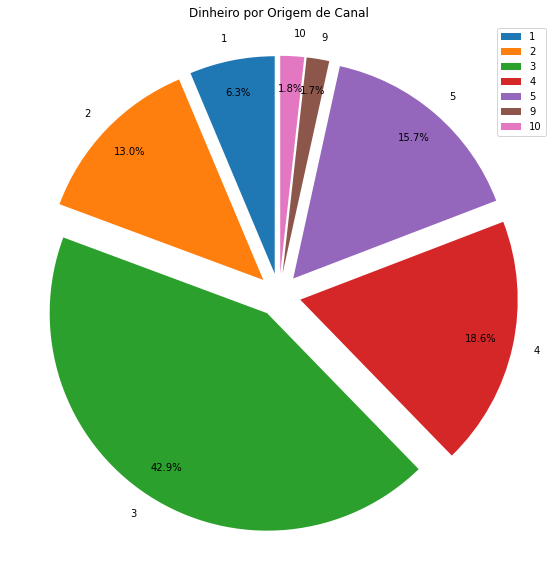

In [78]:
# Dinheiro por origem - gráfico

# Definindo os rótulos e valores para o gráfico
labels = total_canal.index
values = total_canal.values

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 10))

# Separando as fatias
explode = (0.1,) * len(labels)

# Plotando o gráfico de pizza
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, pctdistance=0.85)

# Adicionando legenda
ax.legend(labels, loc='best')

# Configurando o título do gráfico
ax.set_title('Dinheiro por Origem de Canal')

# Exibir o gráfico
plt.show()


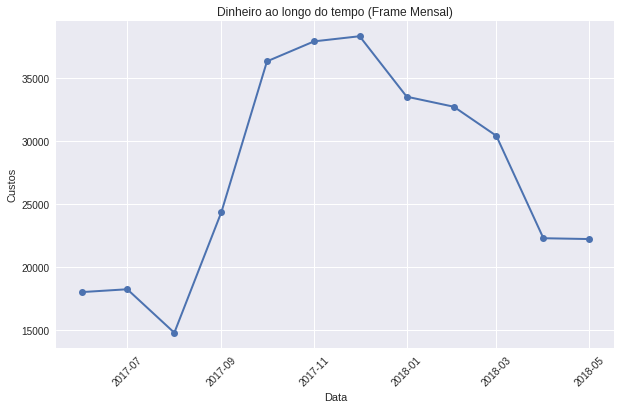

In [79]:
# Dinheiro gasto por mês

# Convertendo a coluna 'dt' para o tipo 'datetime'
total_month['dt'] = pd.to_datetime(total_month['dt'].astype(str))

# Definindo o estilo do gráfico
plt.style.use('seaborn')

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o gráfico de linha
ax.plot(total_month['dt'], total_month['costs'], marker='o', linewidth=2)

# Configurando os rótulos dos eixos
ax.set_xlabel('Data')
ax.set_ylabel('Custos')
ax.set_title('Dinheiro ao longo do tempo (Frame Mensal)')

# Girar os rótulos do eixo x em 45 graus para melhor legibilidade
plt.xticks(rotation=45)

# Exibir a grade do gráfico
ax.grid(True)

# Exibir o gráfico
plt.show()

In [80]:
total_month

,dt,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


##### Conclusão

Com base nos dados fornecidos, podemos tirar algumas conclusões:

1. O total gasto foi de 329.132 dólares. Isso nos dá uma visão geral do valor total gasto em custos.

2. A distribuição dos custos por origem de canal é a seguinte:
   - Source_id 3 teve o maior gasto, totalizando 141.321,63 dólares.
   - Source_id 4 teve o segundo maior gasto, totalizando 61.073,60 dólares.
   - Source_id 5 teve o terceiro maior gasto, totalizando 51.757,10 dólares.
   - Source_id 2 teve um gasto de 42.806,04 dólares.
   - Source_id 1 teve um gasto de 20.833,27 dólares.
   - Source_id 10 teve um gasto de 5.822,49 dólares.
   - Source_id 9 teve um gasto de 5.517,49 dólares.

3. Ao observar os custos ao longo do tempo, podemos identificar tendências mensais. Os meses de maior gasto foram:
   - Outubro de 2017, com 36.322,88 dólares.
   - Novembro de 2017, com 37.907,88 dólares.
   - Dezembro de 2017, com 38.315,35 dólares.

4. Os meses de menor gasto foram:
   - Agosto de 2017, com 14.790,54 dólares.
   - Junho de 2017, com 18.015,00 dólares.
   - Julho de 2017, com 18.240,59 dólares.

Essas conclusões nos ajudam a entender a distribuição dos custos por origem de canal e a identificar os meses com maior e menor gasto. Essas informações podem ser úteis para tomadas de decisão relacionadas a alocação de recursos, otimização de gastos e identificação de tendências sazonais.

#### Quanto custou a aquisição de clientes para cada origem? - CAC

Iremos utilizar a base df_visits_first, para encontrar em que canal que o cliente que adquiriu um produto veio e o volume de clientes por canal e depois iremos utilizar a df total_canal para calcular o CAC por canal.

In [81]:
# Mostrando a df_visits_first
df_visits_first

,uid,source_id,start_ts
0,11863502262781,3,2018-03-01 17:27:00
1,49537067089222,2,2018-02-06 15:55:00
2,297729379853735,3,2017-06-07 18:47:00
3,313578113262317,2,2017-09-18 22:49:00
4,325320750514679,5,2017-09-30 14:29:00
...,...,...,...
277865,18446403737806311543,5,2017-11-30 03:36:00
277866,18446424184725333426,4,2017-12-06 20:32:00
277867,18446556406699109058,3,2018-01-01 16:29:00
277868,18446621818809592527,4,2017-12-27 13:27:00


In [82]:
# Agrupando o número de clientes por source_id
clientes_per_source = df_visits_first.groupby('source_id')['uid'].nunique().reset_index()

clientes_per_source

,source_id,uid
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [83]:
# Coletando a total canal
total_canal = total_canal.reset_index()

total_canal

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [84]:
# juntando dfs

merge_channel = total_canal.merge(clientes_per_source, on = 'source_id')

merge_channel

,source_id,costs,uid
0,1,20833.27,18999
1,2,42806.04,26245
2,3,141321.63,74756
3,4,61073.60,83525
4,5,51757.10,56974
5,9,5517.49,9264
6,10,5822.49,8067


In [85]:
# calculando o CAC
merge_channel['cac'] = merge_channel['costs']/merge_channel['uid']

merge_channel

,source_id,costs,uid,cac
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766


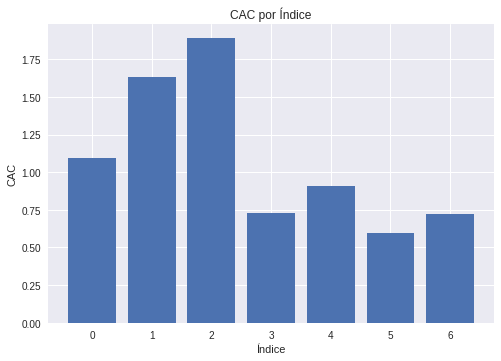

In [86]:
# valores da coluna 'cac'
cac_values = merge_channel['cac']

# índices para as barras
indices = merge_channel.index

# figura e os eixos
fig, ax = plt.subplots()

# plot do gráfico de barras
ax.bar(indices, cac_values)

# rótulos dos eixos
ax.set_xlabel('Índice')
ax.set_ylabel('CAC')
ax.set_title('CAC por Índice')

# Exibir o gráfico
plt.show()

##### Conclusão

Podemos tirar as seguintes conclusões:

1) Variação nos Custos de Aquisição por Cliente (CAC): Existem diferenças significativas nos custos de aquisição de clientes entre as origens de canal. A origem de canal 3 apresenta o maior CAC, enquanto a origem de canal 9 tem o menor CAC.

2) Eficiência da Aquisição: As origens de canal 4, 5, 9 e 10 demonstram uma maior eficiência em termos de custo na aquisição de clientes, pois possuem CACs relativamente baixos.

3) Distribuição dos Custos: A origem de canal 3 tem o maior custo total, seguida pelas origens de canal 2, 4 e 5. Isso indica a necessidade de alocar recursos de forma estratégica, considerando a eficiência e o custo de aquisição em cada origem de canal.


In [87]:
# Convert 'dt' to month period in df_costs
df_costs['month'] = df_costs['dt'].dt.to_period('M')

# Aggregate costs by source_id and month
monthly_costs = df_costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()

# Convert 'first_activity_date' to month period in df_visits
df_visits['first_activity_month'] = df_visits['first_activity_date'].dt.to_period('M')

# Count new users acquired each month per source_id
new_users = df_visits.groupby(['source_id', 'first_activity_month']).uid.nunique().reset_index(name='n_users')

# Merge monthly_costs and new_users
cac = pd.merge(monthly_costs, new_users, how='left', left_on=['source_id', 'month'], right_on=['source_id', 'first_activity_month'])

# Calculate CAC
cac['cac'] = cac['costs'] / cac['n_users']

# Pivot to create CAC cohort table
cac_pivot = cac.pivot_table(index='first_activity_month', columns='source_id', values='cac', aggfunc='sum')

# Print cac_pivot
cac_pivot

source_id,1,2,3,4,5,9,10
first_activity_month,,,,,,,
2017-06,0.743959,1.102352,1.487142,0.763755,0.733629,0.269839,0.578674
2017-07,0.836880,1.181920,1.674895,0.760062,0.748599,0.424320,0.837107
2017-08,1.045945,1.433927,1.709864,0.935279,0.672601,0.413505,0.816035
2017-09,0.984279,1.412327,1.665867,0.907579,0.755771,0.506854,0.819698
2017-10,1.034279,1.560386,1.840398,0.682052,0.760169,0.586535,0.646639
2017-11,0.984364,1.531722,1.778661,0.524613,0.995960,0.556789,0.946667
2017-12,1.104340,1.867251,1.967433,0.760518,1.042706,0.710562,1.111635
2018-01,1.327371,1.915127,2.005251,0.678310,1.027845,0.792986,0.732241
2018-02,1.419498,2.144938,1.951256,0.724592,0.997504,0.905583,0.515413


**Conclusão**

* Aumento geral no CAC ao longo do tempo: De junho de 2017 a maio de 2018, parece que o CAC aumentou para a maioria das fontes de marketing. Isso poderia ser devido a vários fatores, incluindo aumento da concorrência, aumento dos custos de publicidade ou diminuição da eficácia dos esforços de marketing.


* Diferenças significativas no CAC entre as fontes de marketing: A fonte 3 tende a ter o maior CAC, enquanto a fonte 9 geralmente tem o menor. Isso sugere que a fonte 3 pode ser a mais cara para adquirir novos usuários, enquanto a fonte 9 é a mais econômica. No entanto, isso não necessariamente significa que a fonte 9 é a melhor, pois também precisamos considerar a qualidade ou a vida útil do cliente (LTV) dos usuários adquiridos de cada fonte.


* Variações no CAC dentro das fontes de marketing: Além disso, o CAC para uma determinada fonte de marketing varia ao longo do tempo. Por exemplo, o CAC da fonte 1 aumentou constantemente até fevereiro de 2018 e diminuiu um pouco nos meses seguintes. Isso poderia ser devido a mudanças na estratégia de marketing, no mercado ou em outros fatores.

#### Os investimentos valeram a pena? (ROI)

Iremos calcular o ROI geral.

In [88]:
# relembrando a df_costs
df_costs.head(2)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06


In [89]:
# relembrando df_orders
df_orders.head(2)

,buy_ts,revenue,uid,buy_ts_day,week,month,cohort_month,order_month,cohort_age
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,6,2017-06,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,6,2017-06,2017-06,0


In [90]:
# ROI Geral

# total revenue
total_rev = df_orders['revenue'].sum()

# total cost
total_cost = df_costs['costs'].sum()

# Calculo do ROI geral
roi_geral = (total_rev - total_cost)/(total_cost)

print(f'O ROI geral foi de {roi_geral }')

O ROI geral foi de -0.2341750695360112


#### Conclusão

Podemos ver que o ROI da operação foi negativa informando que não as campanhas não estão gerando resultado positivo de investimento.

In [91]:
# buy_ts para mes
df_orders['order_month'] = df_orders['buy_ts'].dt.to_period('M')

# encontrar o usuários por mes
first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# calculando o tamanho do cohort
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# margin rate
margin_rate = 0.4

# merge de df
df_orders = pd.merge(df_orders, first_orders, on='uid')

# calculando margem e gp
cohorts = df_orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['gp'] = report['revenue'] * margin_rate

# tempo de cohort
report['age'] = (report['order_month'] - report['first_order_month']).apply(lambda x: x.n)
report['age'] = report['age'].round().astype('int')

# calculando LTV
report['ltv'] = report['gp'] / report['n_buyers']

# preparando df_costs
monthly_costs = df_costs.groupby('month').sum().reset_index()

# Merge report com monthly_costs
report = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month', how='left')

# calculando CAC e ROMI
report['cac'] = report['costs'] / report['n_buyers']
report['romi'] = report['ltv'] / report['cac']

# Pivot para criação dos dados
output = report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

In [92]:
# imprimindo cohort
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.212212,0.021800,0.019658,0.042882,0.045930,0.033037,0.042692,0.026124,0.024849,0.027211,0.025660,0.011537
2017-07,0.253449,0.014136,0.026294,0.015138,0.007455,0.006580,0.005069,0.005981,0.006799,0.006205,0.006565,NaN
2017-08,0.195499,0.017488,0.016987,0.014497,0.018305,0.010505,0.007805,0.015006,0.010827,0.006965,NaN,NaN
2017-09,0.239133,0.047347,0.022069,0.168436,0.016970,0.027413,0.029724,0.010301,0.007796,NaN,NaN,NaN
2017-10,0.239146,0.025606,0.009147,0.007511,0.007244,0.005753,0.004054,0.005519,NaN,NaN,NaN,NaN
2017-11,0.221972,0.017192,0.008593,0.013993,0.006374,0.002320,0.004949,NaN,NaN,NaN,NaN,NaN
2017-12,0.216806,0.011914,0.042330,0.048744,0.014319,0.015468,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.166469,0.011865,0.012248,0.005747,0.002524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.185523,0.012419,0.003504,0.003309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conclusões**

Analisando os dados de ROI (Retorno sobre Investimento) apresentados, podemos tirar algumas conclusões:

O Retorno sobre Investimento tende a diminuir com o tempo para cada coorte. Isso é comum, já que o engajamento do usuário e a probabilidade de realizar uma compra geralmente diminuem após o primeiro mês.

A coorte de junho de 2017 parece ser a mais lucrativa no longo prazo, pois apresenta retornos positivos ao longo de 12 meses. Mesmo depois de um ano, essa coorte ainda está gerando um retorno positivo sobre o investimento.

A coorte de setembro de 2017 teve um aumento considerável do ROI no terceiro mês. Isso poderia ser investigado mais a fundo para entender o que causou esse pico.

As coortes mais recentes (2018) estão apresentando um retorno decrescente sobre o investimento após o primeiro mês. Isso poderia ser um sinal de que as estratégias de retenção de clientes atuais podem não estar funcionando tão bem quanto no passado.

### Análise Extra

Iremos análisar para cada dispositivo:

* Utilização de cada canal de dispositivo;
* Comprimento médio de seção por dispositivo;

Iremos realizar essas análises para entender qual a tendência de acesso dos usuários, assim saberemos em quais dispositivos os usuários mais usam os serviços e acessam. Podendo dar uma boa noção para a equipe de marketing.

In [93]:
# chamando a df_visits
df_visits.head(2)

,device,end_ts,source_id,start_ts,uid,end_ts_day,start_ts_day,week,month,year,session_length,first_activity_date,activity_month,first_activity_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,20,51,12,2017,1080,2017-12-20 17:20:00,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,19,8,2,2018,1680,2018-02-19 16:53:00,2018-02,2018-02,0


In [94]:
# Calculando o número de usuários únicos em cada dispositivo
disp_unique = df_visits.groupby('device')['uid'].nunique().sort_index().reset_index()

# mostrando
disp_unique

,device,uid
0,desktop,164523
1,touch,71345


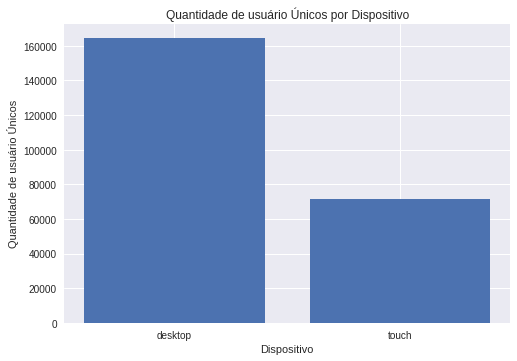

In [95]:
# extraindo os dados para o gráfico
devices = disp_unique['device']
unique_uids = disp_unique['uid']

# criando a figura e os eixos
fig, ax = plt.subplots()

# plotando o gráfico de barras
ax.bar(devices, unique_uids)

# configurando os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Dispositivo')
ax.set_ylabel('Quantidade de usuário Únicos')
ax.set_title('Quantidade de usuário Únicos por Dispositivo')

# Exibir o gráfico
plt.show()

In [96]:
# Calculando o tempo médio de usuários únicos em cada dispositivo
disp_mean = df_visits.groupby('device')['session_length'].median().sort_index().reset_index()

# mostrando
disp_mean

,device,session_length
0,desktop,360
1,touch,180


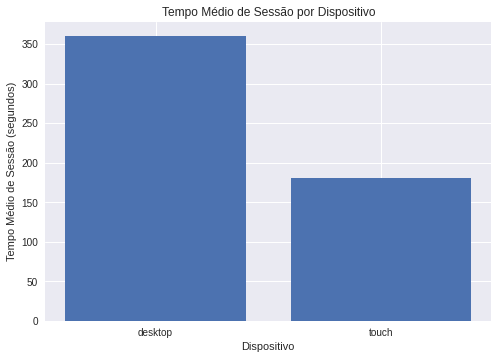

In [97]:
# extraindo os dados para o gráfico
devices = disp_mean['device']
median_session_length = disp_mean['session_length']

# criando a figura e os eixos
fig, ax = plt.subplots()

# plotando o gráfico de barras
ax.bar(devices, median_session_length)

# configurando os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Dispositivo')
ax.set_ylabel('Tempo Médio de Sessão (segundos)')
ax.set_title('Tempo Médio de Sessão por Dispositivo')

# Exibir o gráfico
plt.show()

#### Conclusão

Podemos ver que os usuários acessam e tem maior longevidade no site pelo dispositivo Desktop, esse sendo mais interessante para a prospecção e futuras campanhas.

## Conclusão geral

Com base na análise detalhada das tendências de uso, eficiência do canal de marketing, custos de aquisição, retorno sobre investimento (ROI) e comportamento do usuário, recomendamos as seguintes estratégias para otimizar o investimento em marketing:

1) **Investimento Sazonal e Estratégico**: O aumento na utilização do meio para o fim do ano sugere uma sazonalidade que deve ser aproveitada. Nesse sentido, recomenda-se um aumento nos investimentos em marketing de Outubro a Março, aproveitando a demanda natural já elevada. Por outro lado, um esforço de marketing estratégico no período de menor uso (Junho a Agosto) pode ajudar a manter a base de usuários engajada e talvez estimular um crescimento de uso nesse período de baixa.

2) **Investigação de Anomalias**: As anomalias observadas nos meses de Dezembro e Abril devem ser investigadas para entender melhor o comportamento do usuário e otimizar as estratégias de marketing com base nesses insights. Pode haver eventos específicos ou fatores externos que influenciam essas anomalias e, ao compreendê-los, pode-se aproveitar melhor essas oportunidades.

3) **Canais Eficientes em Foco**: Com base na eficiência na conversão de usuários, os canais 3, 4 e 5 parecem ser os mais promissores. Sugerimos um investimento maior nesses canais para potencializar o número de conversões. Por outro lado, os canais 7, 9 e 10 parecem estar performando abaixo do desejado, o que exige uma análise mais aprofundada para entender os motivos e tomar as ações corretivas necessárias.

4) **Revisão dos Orçamentos dos Canais**: É fundamental revisar os orçamentos dos canais de marketing, principalmente dos canais 3 e 4, que apresentam os maiores gastos. Considerando a eficiência de conversão desses canais, uma redistribuição de recursos pode ser necessária. Redirecionar parte desse orçamento para canais mais eficientes, como o canal 5, pode ser uma estratégia interessante para otimizar o investimento.

5) **Otimização para Desktop**: Os usuários mostraram uma preferência clara pelo uso de dispositivos Desktop. Portanto, é recomendável que tanto a otimização do site quanto as campanhas de marketing se concentrem neste tipo de dispositivo, garantindo a melhor experiência possível para os usuários.

6) **Melhoria do ROI**: O retorno sobre o investimento atualmente negativo sinaliza a necessidade urgente de repensar as estratégias de marketing atuais. É essencial buscar alternativas para tornar as campanhas mais eficientes e rentáveis, o que pode incluir uma combinação de redução de custos, aumento da eficácia do marketing e foco nos canais de marketing que proporcionam o melhor retorno.

7) **Análise dos Outliers**: Apesar da decisão de remover os outliers para fins de análise, recomendamos que esses dados não sejam completamente ignorados. Os outliers podem representar um comportamento de usuário fora do comum que, se devidamente compreendido, pode revelar oportunidades de marketing não exploradas.

Em suma, a chave para maximizar o retorno do investimento em marketing está em compreender e responder efetivamente ao comportamento do usuário, otimizar os investimentos com base na eficiência do canal, aproveitar a sazonalidade e se adaptar rapidamente com base nos insights obtidos. Este deve ser um esforço contínuo de aprendizado e ajuste, já que o mercado e o comportamento do usuário estão sempre evoluindo.